In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, DecisionTreeRegressor

%matplotlib inline

In [4]:
path =os.getcwd()

In [5]:
df =pd.read_csv(path +'/Kickstarter/cleaned_kick_data01.csv')

In [6]:
df.shape

(85233, 17)

In [7]:
df.head()

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,location,pledged,staff_pick,status,duration,created_day,continent,city,state
0,0,film,GB,2017-01-11,GBP,2017-02-15,1.261110,40000.0,"London, UK",0.0,False,failed,35,11,Europe,London,UK
1,12,crafts,CA,2016-02-28,CAD,2016-03-29,0.748587,5000.0,"London, Canada",357.0,False,failed,30,28,America,London,Canada
2,1,games,AU,2016-02-13,AUD,2016-03-19,0.722499,5000.0,"Perth, AU",1.0,False,failed,35,13,Oceania,Perth,AU
3,3,fashion,US,2015-05-25,USD,2015-07-01,1.000000,1900.0,"Austin, TX",49.0,False,failed,37,25,America,Austin,TX
4,2,film,US,2018-05-18,USD,2018-06-17,1.000000,30000.0,"Los Angeles, CA",2.0,False,failed,30,18,America,Los Angeles,CA


In [8]:
#对标称属性进行独热编码，转变为数值属性
le =LabelEncoder()

In [9]:
df['backers_count'] =le.fit_transform(df['backers_count'].values)
df['category'] =le.fit_transform(df['category'].values)
df['country'] =le.fit_transform(df['country'].values)
df['currency'] =le.fit_transform(df['currency'].values)
df['staff_pick'] =le.fit_transform(df['staff_pick'].values)
df['status'] =le.fit_transform(df['status'].values)
df['duration'] =le.fit_transform(df['duration'].values)
df['created_day'] =le.fit_transform(df['created_day'].values)
df['continent'] =le.fit_transform(df['continent'].values)
df['city'] =le.fit_transform(df['city'].values)
df['state'] =le.fit_transform(df['state'].values)

In [10]:
#对类别信息进行处理
df['continent'] = to_categorical(df['continent']) 
df['category'] =to_categorical(df['category'])
df['country'] =to_categorical(df['country'])
df['city'] =to_categorical(df['city'])
df['state'] =to_categorical(df['state'])
df['currency'] =to_categorical(df['currency'])

In [11]:
df.head()

,backers_count,category,country,created_at,currency,deadline,fx_rate,goal,location,pledged,staff_pick,status,duration,created_day,continent,city,state
0,0,0.0,0.0,2017-01-11,0.0,2017-02-15,1.261110,40000.0,"London, UK",0.0,0,0,34,10,0.0,0.0,0.0
1,12,0.0,0.0,2016-02-28,0.0,2016-03-29,0.748587,5000.0,"London, Canada",357.0,0,0,29,27,1.0,0.0,0.0
2,1,0.0,0.0,2016-02-13,1.0,2016-03-19,0.722499,5000.0,"Perth, AU",1.0,0,0,34,12,0.0,0.0,0.0
3,3,0.0,0.0,2015-05-25,0.0,2015-07-01,1.000000,1900.0,"Austin, TX",49.0,0,0,36,24,1.0,0.0,0.0
4,2,0.0,0.0,2018-05-18,0.0,2018-06-17,1.000000,30000.0,"Los Angeles, CA",2.0,0,0,29,17,1.0,0.0,0.0


In [12]:
X =df.drop(columns=[ 'created_at', 'deadline', 'pledged',  'location',  'status'], axis=1)
y =df['status']

In [13]:
X_train, X_test, y_train,y_test =train_test_split(X, y, test_size =0.2, random_state =1)

使用默认的 gamma 和 C来训练svm模型

In [14]:
ss = StandardScaler()
clf =SVC(kernel= 'rbf', gamma=0.1, C=1)
clf_pipe =Pipeline([('sscale', ss), ('svm', clf)])

In [15]:
start_time =time.time()
clf_pipe.fit(X_train, y_train)
end_time =time.time()
dtime =end_time- start_time
print('运行时间: %.8f s' %dtime)

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('sscale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [16]:
clf_pipe.score(X_train, y_train)

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.8516410993459068

In [17]:
clf_pipe.score(X_test, y_test)

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.8533466299055552

In [19]:
from sklearn.metrics import roc_curve,f1_score, classification_report, precision_score, recall_score,auc

In [20]:
fpr_svm, tpr_svm, thresholds_svm =roc_curve(y_test, clf_pipe.decision_function(X_test))

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:401: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


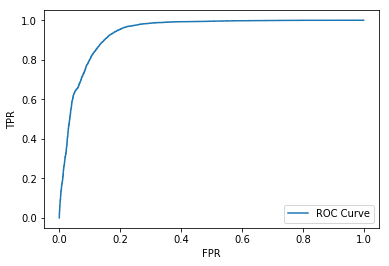

In [21]:
plt.plot(fpr_svm, tpr_svm, label ='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
# cloze_zero =np.argmin(np.abs(thresholds))
# plt.plot(fpr[cloze_zero], tpr[cloze_zero], 'o', markersize =10,
#          label = 'threshold zero', fillstyle ='none', c= 'k', mew = 2)
plt.legend(loc =4)

In [23]:
print('auc of SVM', auc(fpr_svm, tpr_svm))

auc of SVM 0.938900123905148


In [24]:
clfpre =clf_pipe.predict(X_test)

/Users/zhenghongsheng/anaconda3/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [25]:
#计算SVM的f1scores
print('f1 socre of SVM:', f1_score(y_test, clfpre))
print('precison of SVM:', precision_score(y_test, clfpre))
print('recall of SVM:', recall_score(y_test, clfpre))

f1 socre of SVM: 0.8455264458724666
precison of SVM: 0.8856957928802589
recall of SVM: 0.8088426527958388


In [23]:
print(classification_report(y_test, clfpre, target_names=['falied', 'successful']))

              precision    recall  f1-score   support

      falied       0.72      0.93      0.81      8588
  successful       0.90      0.63      0.74      8459

   micro avg       0.78      0.78      0.78     17047
   macro avg       0.81      0.78      0.78     17047
weighted avg       0.81      0.78      0.78     17047



通过网格搜索方式进行调参

In [38]:
#调用GridSearchCV方法实现来寻找SVM最好的参数 gamma和 C
# #

# param_grid =[
#     {'kernel' :['rbf'],
#      'C' : [0.001, 0.01, 0.1, 1, 10, 100],
#      'gamma'  : [0.001, 0.01, 0.1, 1, 10, 100]},
#     {
#         'kernel' : ['linear'],
#         'C' : [0.001, 0.01, 0.1, 1, 10, 100]}]

In [39]:
# grid_search =GridSearchCV(SVC(), param_grid, cv=3)

In [29]:
# grid_pipe =Pipeline([('sscale', ss), ('grid_search', grid_search)])

In [ ]:
# grid_search.fit(X_train, y_train)

In [ ]:
#返回网格搜索后的最佳参数
# print('Best parameters:{}'.format(grid_pipe.best_params_))

In [ ]:
#返回交叉验证后的最佳精度
# print('Best cross_validation:{:.2f}'.format(grid_pipe.best_score_))

In [ ]:
#返回网格搜索后的最佳模型
# print('Best estimator:\n{}'.format(grid_pipe.best_estimator_))

In [ ]:
#返回网格搜索的results
# results =pd.DataFrame(grid_pipe.cv_results_)
# display(results.T)

In [ ]:
#对交叉验证的结果进行热力图可视化
# scores =np.array(results.mean_test_score).reshape(6 , 6)
# sns.heatmap(scores, xlabel ='gamma', xticklabels =param_grid['gamma'], ylabel ='C', yticklabels =param_grid['C'], cmap="YlGnBu")